In [1]:
#url = "dm.csv"
import pandas as pd
import numpy as np
dm = pd.read_csv("dm.csv")
dm.head(10)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151
5,Young,Male,Own,Married,Close,30400,0,Low,6,495,320
6,Middle,Female,Rent,Single,Close,48100,0,Medium,12,782,804
7,Middle,Male,Own,Single,Close,68400,0,High,18,1155,790
8,Middle,Female,Own,Married,Close,51900,3,Low,6,158,43
9,Old,Male,Own,Married,Far,80700,0,NaN,18,3034,475


In [2]:
#Created a function to classify good and bad customers
def get_good(x):
    if x > dm['AmountSpent'].mean():
        return 1
    else:
        return 0

In [3]:
#Created a new column named Target which will have the binary values according to good and bad type
dm['Target'] = dm['AmountSpent'].map(get_good)

In [4]:
dm['AmountSpent'].mean()

1216.77

In [5]:
dm.head(2)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id,Target
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127,1


In [6]:
dm_rel = dm.drop(['AmountSpent', 'Cust_Id'], axis=1)

In [7]:
dm_rel.head(20)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,Target
0,Old,Female,Own,Single,Far,47500,0,High,6,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1
2,Young,Female,Rent,Single,Close,13500,0,Low,18,0
3,Middle,Male,Own,Married,Close,85600,1,High,18,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,1
5,Young,Male,Own,Married,Close,30400,0,Low,6,0
6,Middle,Female,Rent,Single,Close,48100,0,Medium,12,0
7,Middle,Male,Own,Single,Close,68400,0,High,18,0
8,Middle,Female,Own,Married,Close,51900,3,Low,6,0
9,Old,Male,Own,Married,Far,80700,0,NaN,18,1


In [8]:
dm_rel.isnull().sum()

Age           0
Gender        0
OwnHome       0
Married       0
Location      0
Salary        0
Children      0
History     303
Catalogs      0
Target        0
dtype: int64

In [9]:
#Filled blank values
dm_rel['History'] = dm_rel['History'].fillna("New_Cust")

In [10]:
dm_rel.isnull().sum()

Age         0
Gender      0
OwnHome     0
Married     0
Location    0
Salary      0
Children    0
History     0
Catalogs    0
Target      0
dtype: int64

In [11]:
#To automatically create dummy values for categorical values(One Hot Encoding)
dm_rel = pd.get_dummies(dm_rel)

In [12]:
dm_rel.head()

,Salary,Children,Catalogs,Target,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium,History_New_Cust
0,47500,0,6,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0
1,63600,0,6,1,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0
2,13500,0,18,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0
3,85600,1,18,1,1,0,0,0,1,1,0,1,0,1,0,1,0,0,0
4,68400,0,12,1,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0


In [13]:
train = dm_rel.sample(frac = 0.7, random_state=42)
test = dm_rel.drop(train.index)

In [14]:
print(train.shape)
print(test.shape)

(700, 19)
(300, 19)


In [15]:
X_train = train.drop('Target', axis=1)
y_train = train['Target']





X_test = test.drop('Target', axis=1)
y_test = test['Target']

In [16]:
X_train.head()

,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium,History_New_Cust
521,24400,0,6,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0
737,21900,2,24,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0
740,37100,2,24,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0
660,10600,2,12,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0
411,42500,1,6,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1


In [17]:
y_train.head()

521    0
737    0
740    0
660    0
411    0
Name: Target, dtype: int64

In [18]:
X_test.head()

,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium,History_New_Cust
1,63600,0,6,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0
4,68400,0,12,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0
13,111400,0,12,1,0,0,0,1,1,0,1,0,1,0,1,0,0,0
14,110000,0,24,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0
20,14300,2,6,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0


In [19]:
y_test.head()

1     1
4     1
13    1
14    1
20    0
Name: Target, dtype: int64

In [20]:
#DT Classifier
import sklearn.tree as tree

In [21]:
mod1 = tree.DecisionTreeClassifier(max_depth=5, criterion = "entropy")

In [22]:
mod1 = mod1.fit(X_train,y_train)

In [23]:
preds = mod1.predict(X_test)

In [24]:
preds

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1], d

In [25]:
actual= y_test.values

In [26]:
actual

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], d

In [27]:
#Prediction Accuracy
((actual == preds).sum())/300

0.8833333333333333

In [28]:
import sklearn.metrics as metrics

In [29]:
metrics.confusion_matrix(actual, preds)

array([[157,  14],
       [ 21, 108]], dtype=int64)

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

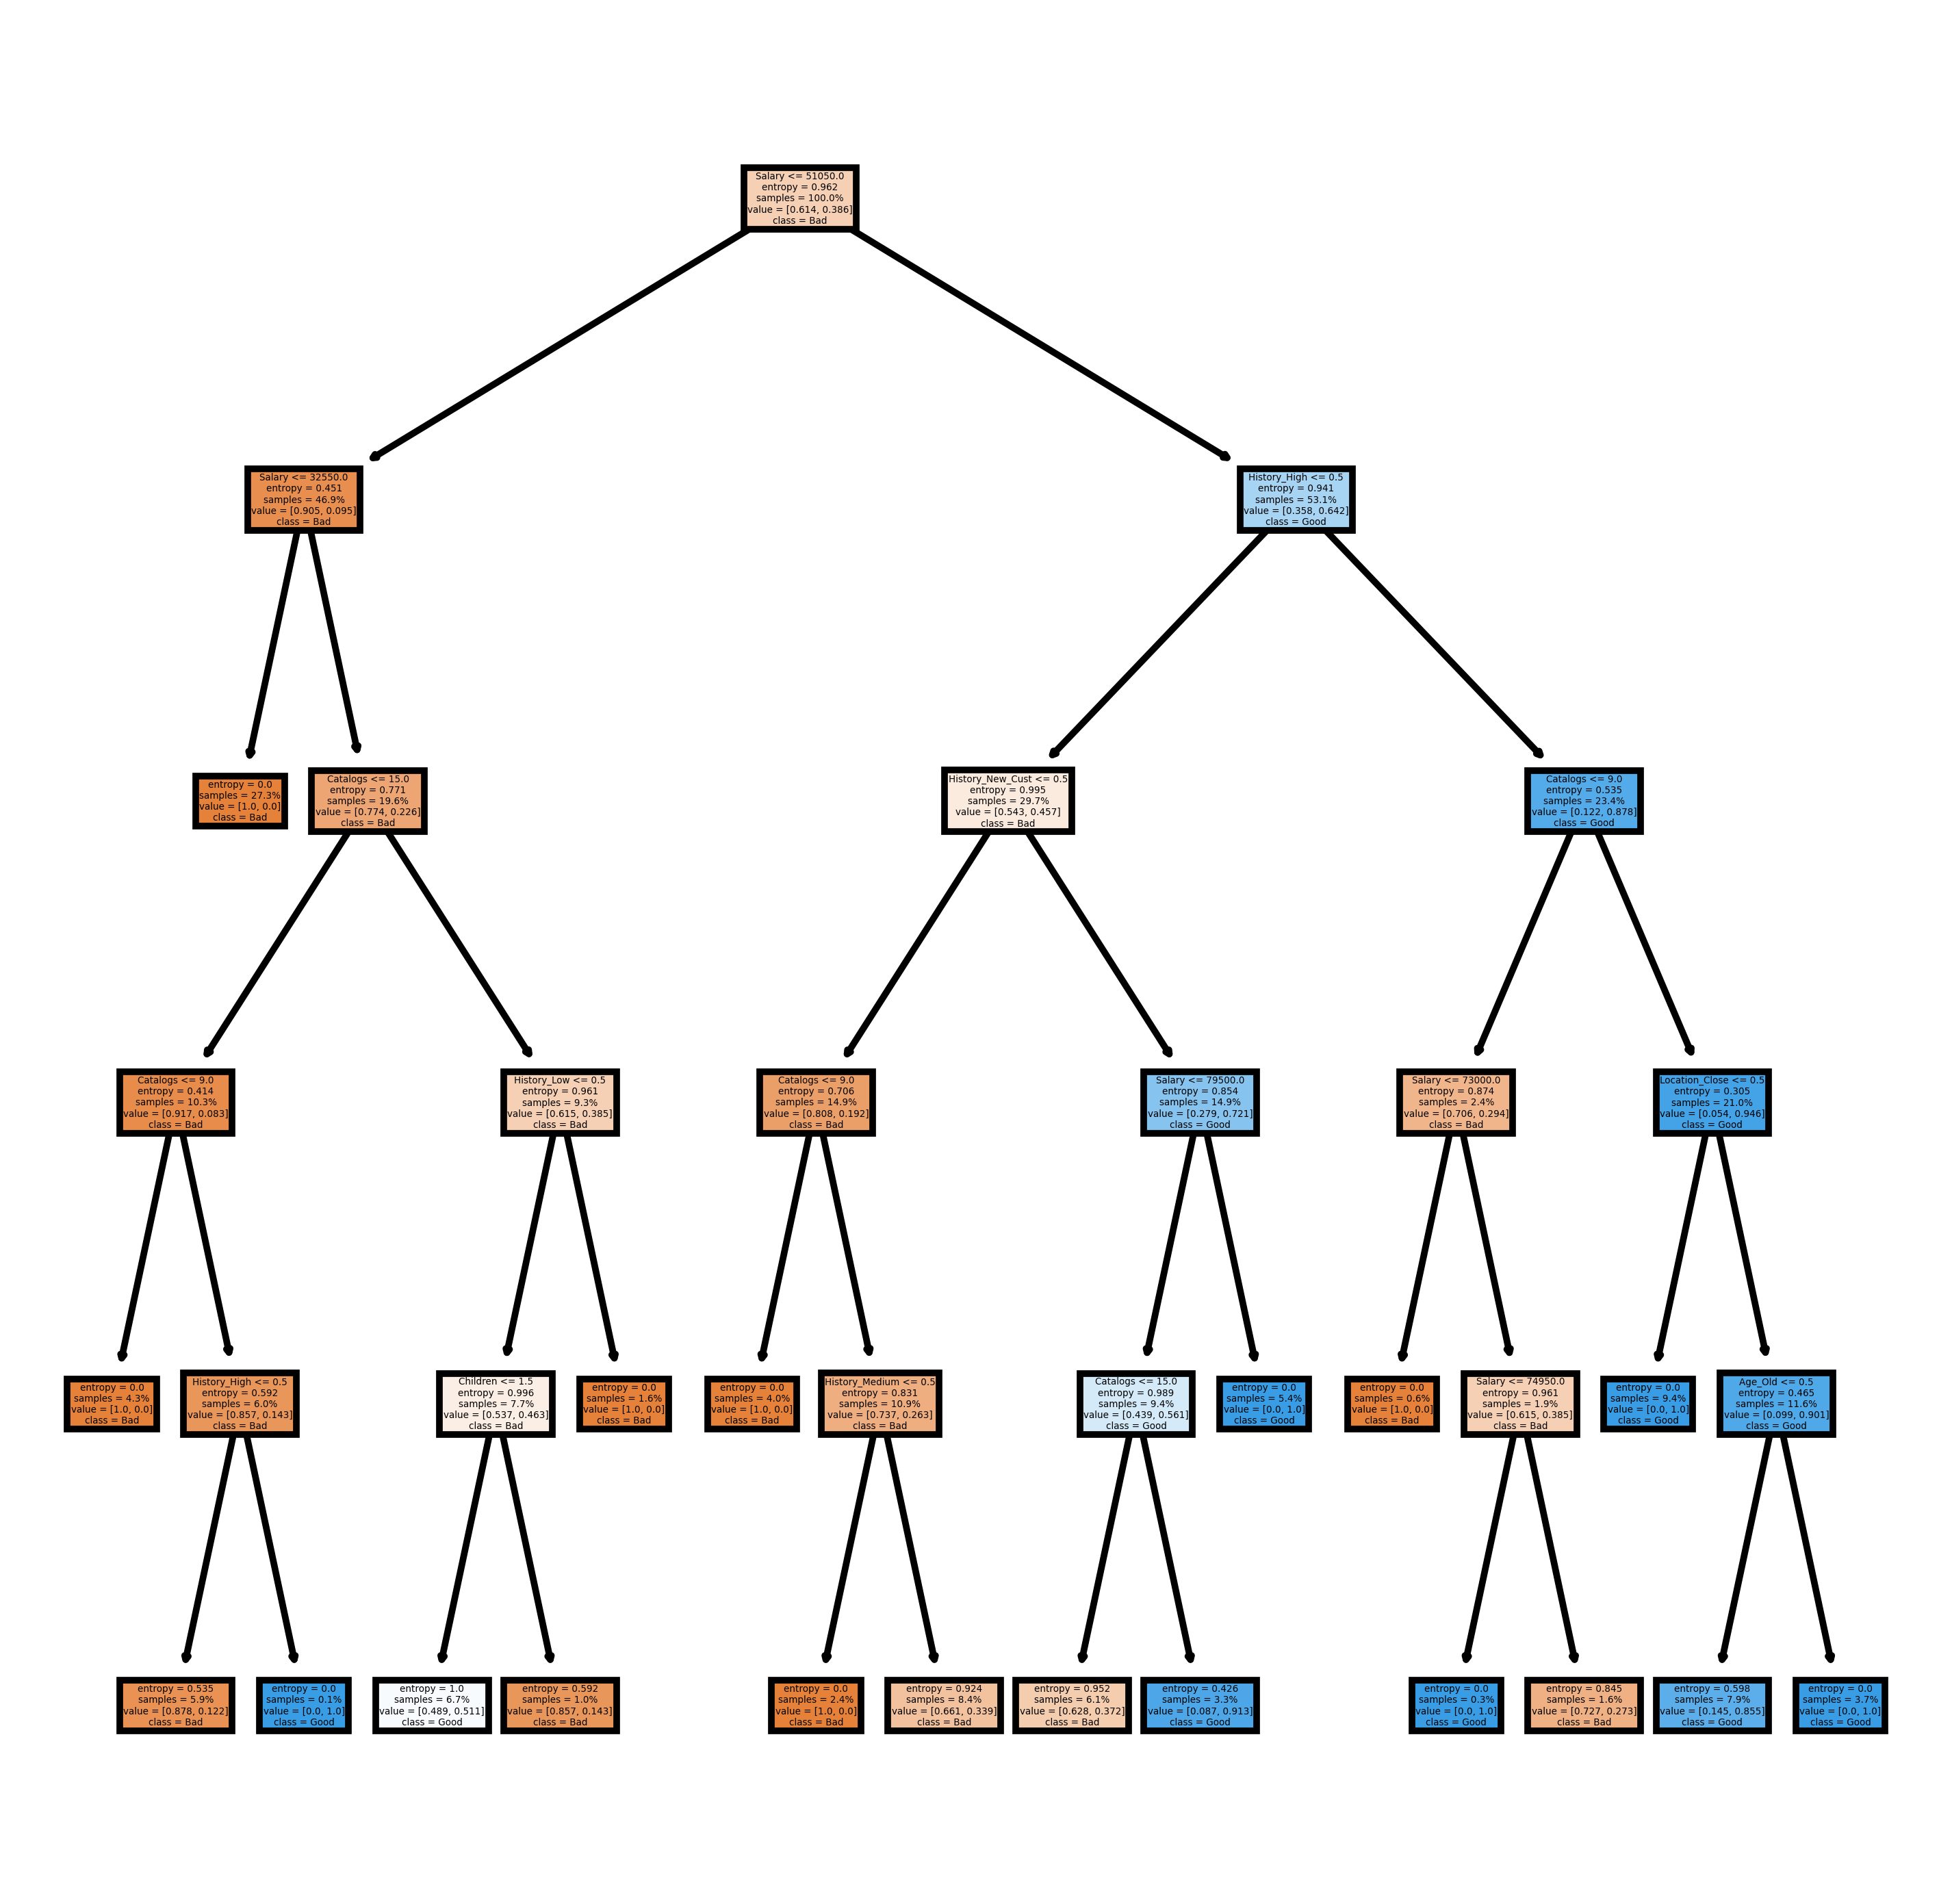

In [31]:
plt.figure(figsize = (5,5), dpi = 700)
tree.plot_tree(mod1, feature_names = X_train.columns.to_list(),
              class_names = ["Bad", "Good"],
              filled=True, proportion = True)
plt.show()

In [32]:
dm.head(2)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id,Target
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127,1


In [33]:
dm = dm.drop(['Cust_Id', 'Target'], axis = 1)

In [34]:
dm.isnull().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
dtype: int64

In [35]:
dm['History'] = dm['History'].fillna("New_Cust")

In [36]:
dm.head(2)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318


In [37]:
dm = pd.get_dummies(dm)
dm.head(2)

,Salary,Children,Catalogs,AmountSpent,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium,History_New_Cust
0,47500,0,6,755,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0
1,63600,0,6,1318,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0


In [38]:
train = dm.sample(frac = 0.7, random_state=42)
test = dm.drop(train.index)

In [39]:
X_train = train.drop('AmountSpent', axis=1)
y_train = train['AmountSpent']
X_test = test.drop('AmountSpent', axis=1)
y_test = test['AmountSpent']

In [40]:
reg1 = tree.DecisionTreeRegressor(max_depth = 3)

In [41]:
reg1 = reg1.fit(X_train,y_train) 

In [42]:
preds = reg1.predict(X_test)

In [43]:
preds-y_test

1      -141.521186
4      -127.521186
13     -867.406977
14    -3012.627273
20      191.470270
          ...     
981    -132.228571
982      65.470270
987   -3665.627273
992     327.593023
996     103.478814
Name: AmountSpent, Length: 300, dtype: float64

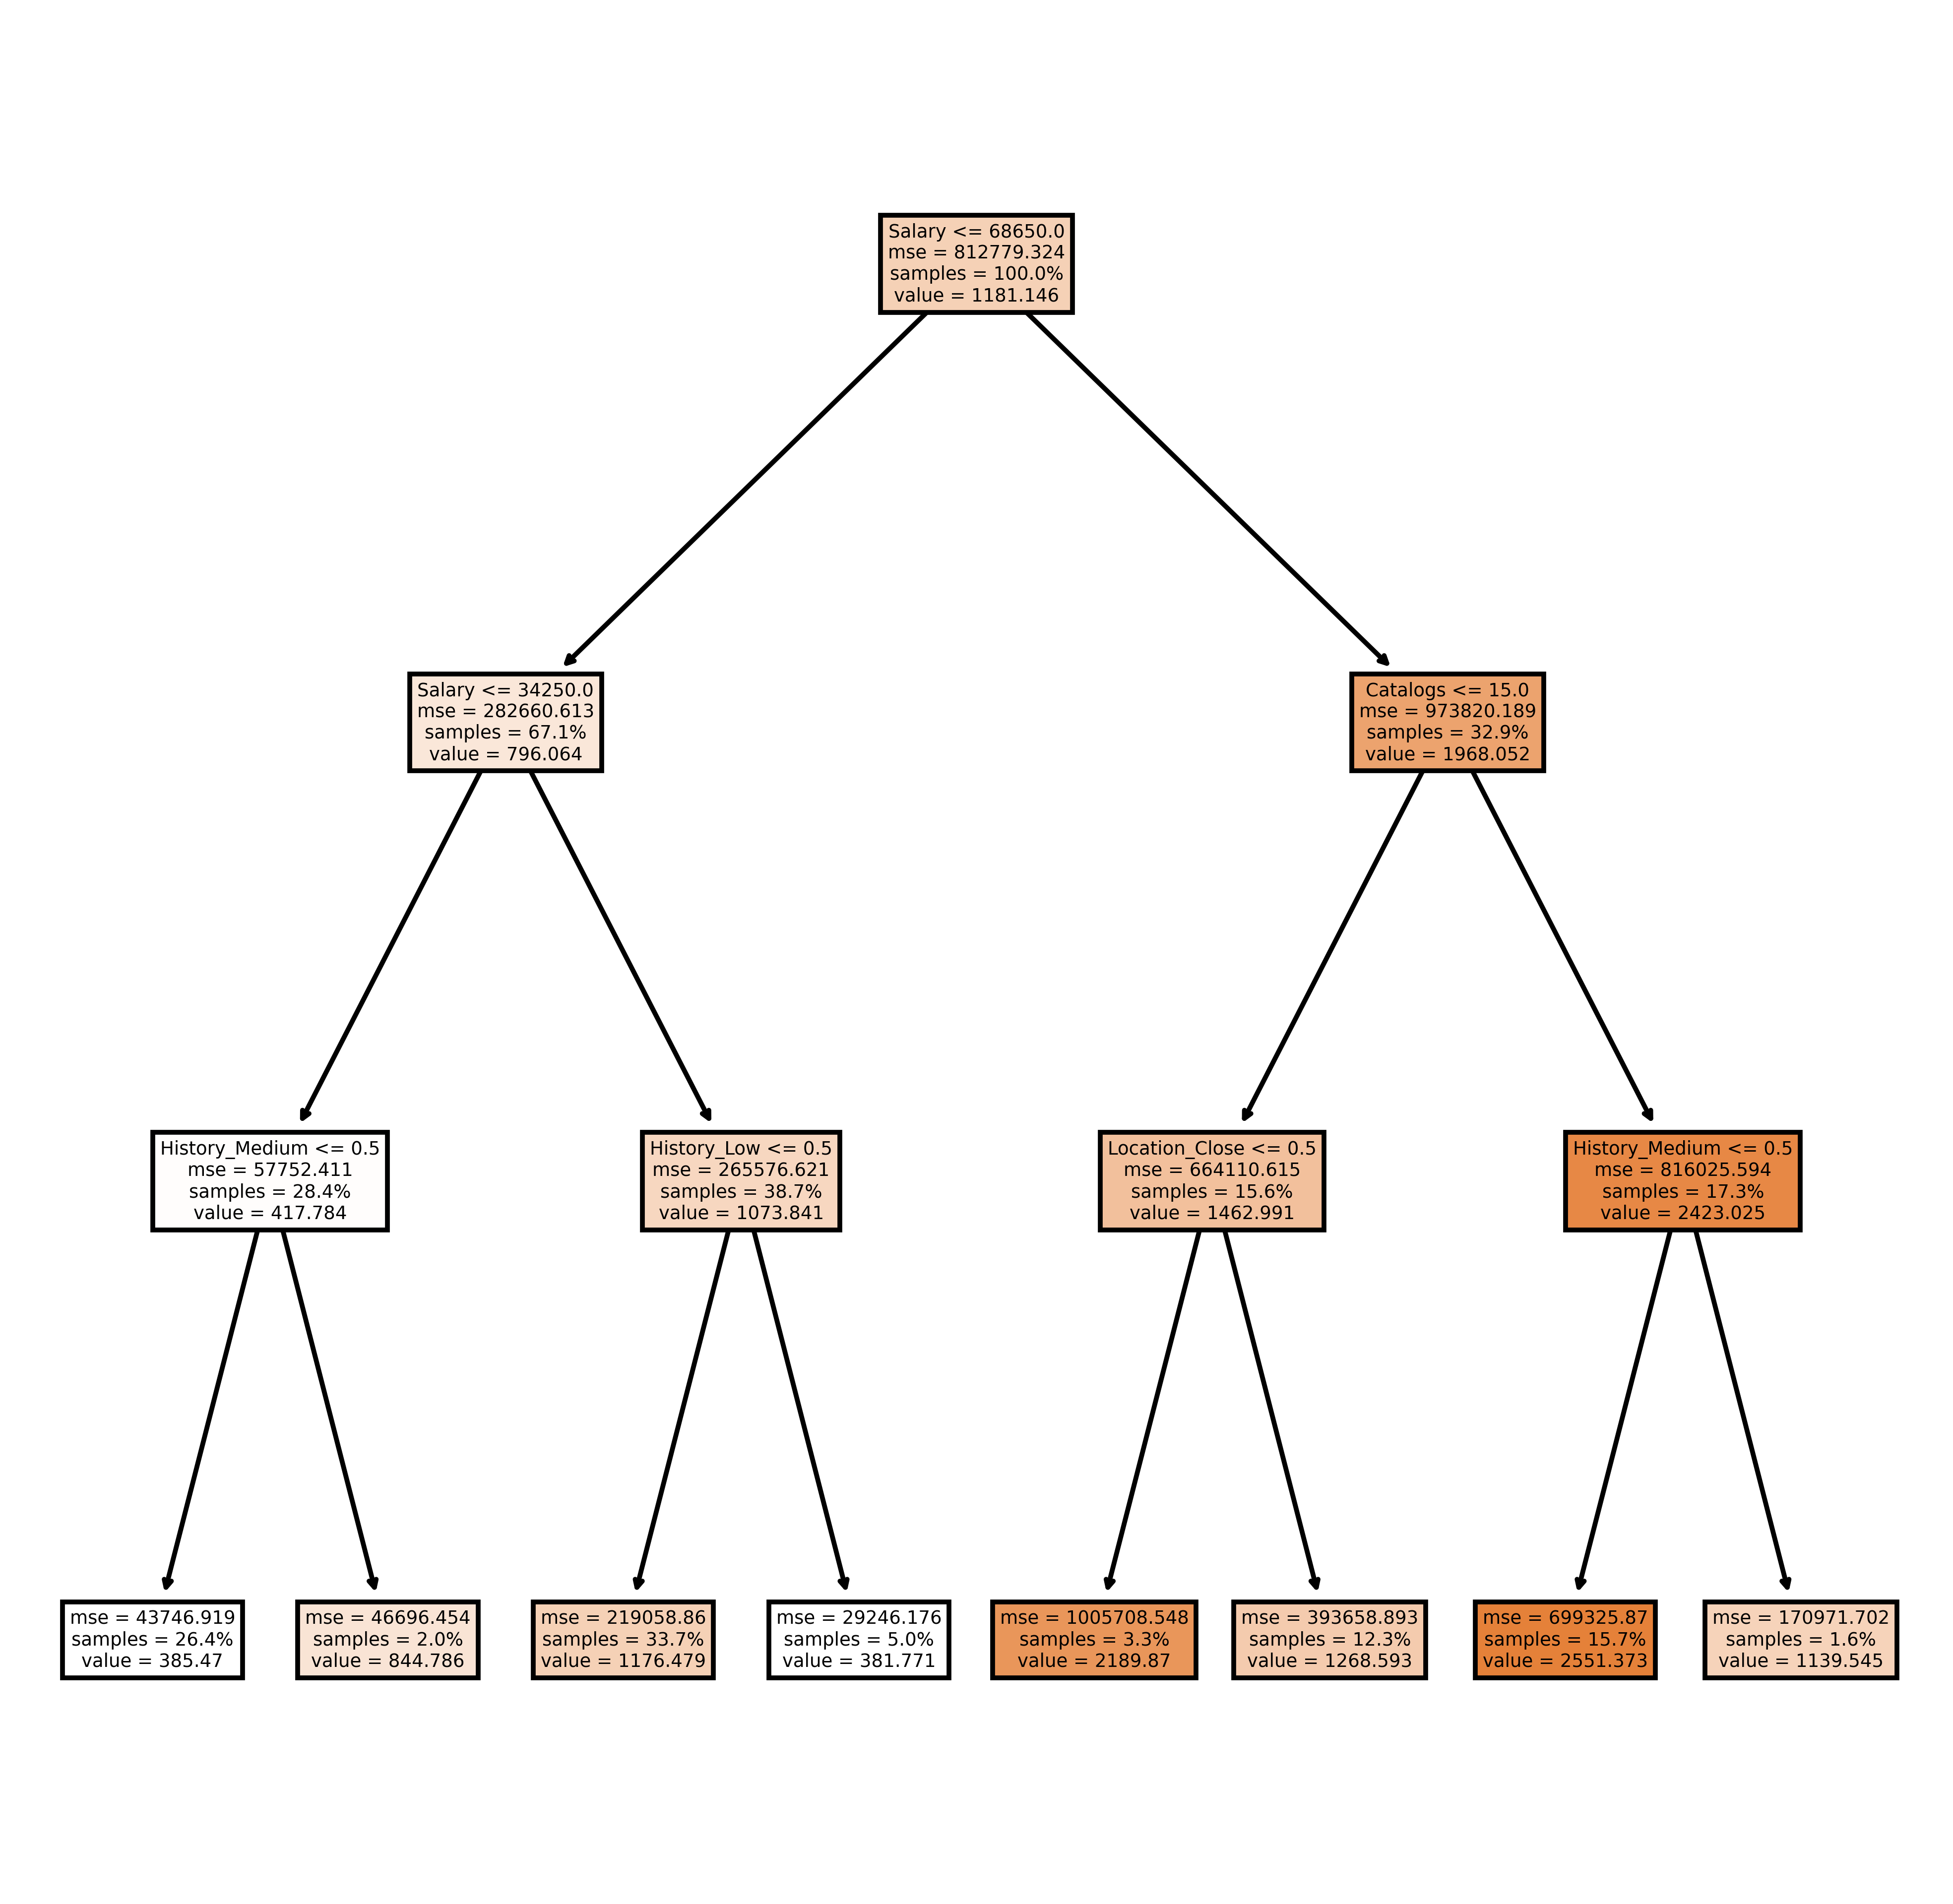

In [44]:
plt.figure(figsize = (7,7), dpi = 700)
tree.plot_tree(reg1, feature_names = X_train.columns.to_list(),
              filled=True, proportion = True)
plt.show()